In [1]:
install.packages("twitteR", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/Dan/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dan\AppData\Local\Temp\RtmpaAziRW\downloaded_packages


In [1]:
library(twitteR) 
# register_google(key = Sys.getenv("MAPS_API"))
consumer_key <- "OumzA854PAnWwA8VNjwZ6O1T1"
consumer_secret <-"aHWN7hVHFYGTJIqLG6d1sUgT2tzelmB7LNxtQjJz0RkmLDIFGW"
access_token <- "1090616125191344128-duT5OEgNKztxTNgE7oa9R96U6HAPp7"
access_secret <- "3WHrVZ9oFu38Alhji03USyhUewk25FFmyGCDYAoYXazNW" 
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

Warning message:
"package 'twitteR' was built under R version 3.5.2"

[1] "Using direct authentication"


In [8]:
library("ggmap")
library(maps)
library(dplyr)
# indianCities <- read.csv(file.choose())
userLocations <- read.csv(file.choose())
userLocations$event_date <- as.Date(userLocations$event_date, "%d %B %Y")
latLongGroup <-userLocations %>% group_by(latitude, longitude) %>% summarize(count=n())
userLocations <- merge(userLocations, latLongGroup)


Attaching package: 'dplyr'

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Source : https://maps.googleapis.com/maps/api/staticmap?center=22,82.5&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Warning message:
"Removed 4157 rows containing missing values (geom_point)."

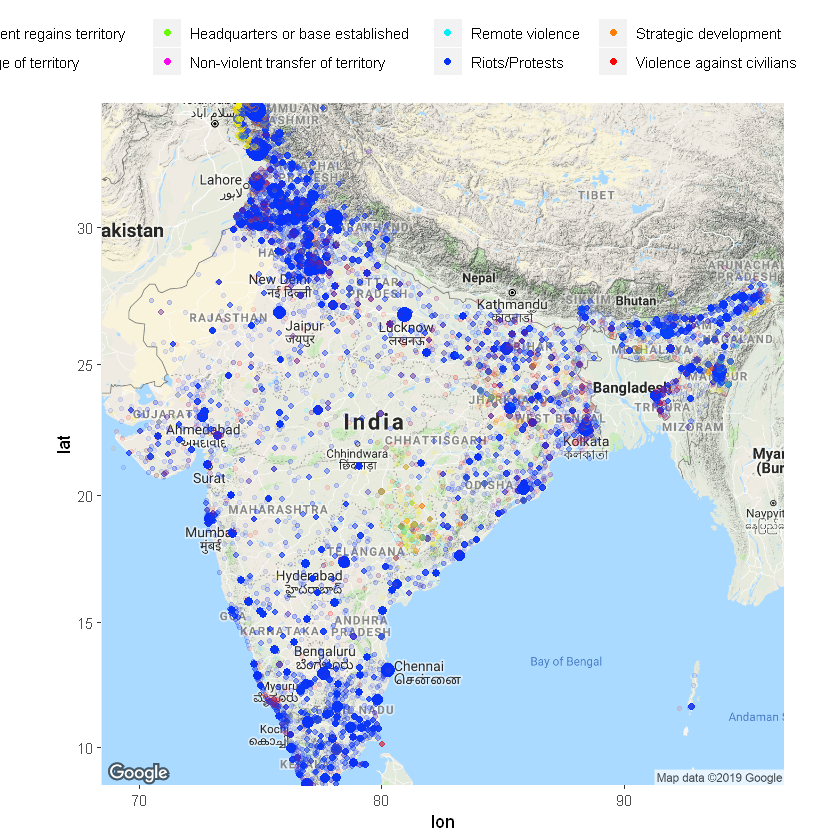

In [28]:
map <- get_map(c(82.5,22), zoom = 5)
# map <- get_map(as.matrix(select(indianCities[indianCities$City == "", ], Longitude, Lattitude))[1:2], zoom = 11)
# map <- get_map(as.matrix(geocode("Thailand")), zoom = 7)

userLocationDate = userLocations[userLocations$event_date <= "2019-01-01", ]
# userLocationCause = userLocationDate[userLocationDate$event_type == "Violence against Citizens", ]
userLocationCause = userLocationDate
ggmap(map) + geom_point(aes(x = longitude, y = latitude, colour = event_type, size = count, alpha = count), data = userLocationCause) + scale_color_manual(values=c("#4248f4", "#f9ec07", "#67f907",  "#f907ec", "#07ecf9", "#0733f9", "#f97f07", "#f90707")) + theme(legend.position="top") 

In [2]:
di <- strip_retweets(tw, strip_manual=TRUE, strip_mt=TRUE)
s = twListToDF(di)
write.csv(userDF, file = "tweetsUsers.csv")
users <- lookupUsers(s$screenName)
userDF = twListToDF(users)

ERROR: Error in strip_retweets(tw, strip_manual = TRUE, strip_mt = TRUE): could not find function "strip_retweets"


In [360]:
geocode("Chennai")

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Chennai&key=xxx


lon,lat
80.27072,13.08268


In [12]:
lookup_statuses("1102810647526440960")[[1]]

[1] "jatindes: What Modi govt did in 5 years? And  Gurgaon is in Haryana and ruled by BJP. Modi should talk less on irrelevant iss… https://t.co/XsXxAf0Em2"